In [1]:
from pygradu import gridify
import shapely.geometry
import pandas as pd
import numpy as np
import importlib

grid = gridify.area_to_grid(side_length=20000)

C:\Users\user\anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\user\anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Original NE: POINT (31.5 66.8)
Original SW: POINT (8.5 53)
Transformed NE: (697681.2863658136, 7416224.9393330095)
Transformed SW: (-735260.4063631196, 6033964.466017238)
col_count 71
row_count 69
grid_size 4899


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
from mpl_toolkits.basemap import Basemap

def visualize_graph(graph, grid):
    nodes = graph.original.drop_duplicates().values
    lats = []
    lons = []
    for node in nodes:
        latlon = grid.extract_coords_lat_lon(node)
        lats.append(latlon[0])
        lons.append(latlon[1])


    nodes = graph.connected.drop_duplicates().values
    lats2 = []
    lons2 = []
    for node in nodes:
        latlon = grid.extract_coords_lat_lon(node)
        lats2.append(latlon[0])
        lons2.append(latlon[1])

    f = plt.figure(figsize=[25,25])
    m = Basemap(llcrnrlon = min(lons),llcrnrlat = min(lats), urcrnrlon = max(lons),
               urcrnrlat = max(lats),
               resolution='l')
    m.shadedrelief()

    plt.plot(lons2, lats2, 'o', c='red', alpha=1, markersize=4)
    plt.plot(lons, lats, 'o', c='orange', alpha=1, markersize=4)

    plt.show()
    
def visualize_graph_connections(graph, grid):
    rows = graph.drop_duplicates().values
    lats = []
    lons = []

    m = Basemap(llcrnrlon = min(lons),llcrnrlat = min(lats), urcrnrlon = max(lons),
               urcrnrlat = max(lats),
               resolution='l')
    m.shadedrelief()
    
    f = plt.figure(figsize=[25,25])
    for row in rows:
        original_latlon = grid.extract_coords_lat_lon(row[0])
        connected_latlon = grid.extract_coords_lat_lon(row[1])
        lats = [original_latlon[0], connected_latlon[0]]
        lons = [original_latlon[1], connected_latlon[1]]

        plt.plot(lons, lats, alpha=1, markersize=2, linewidth=1, c='black')


    plt.show()

In [3]:
pip install basemap


  Using cached pyshp-2.1.3.tar.gz (219 kB)
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=ee2376ec90185e678782e07ad9c35edb74caf79be8bf979ac2e2de458596270c
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\1f\1b\b5\54affbefc8a7e2bdf1da000fc576b8a1c91338f1f327a04f4c
Successfully built pyshp
Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
from mpl_toolkits.basemap import Basemap

def visualize_graph(graph, grid):
    nodes = graph.original.drop_duplicates().values
    lats = []
    lons = []
    for node in nodes:
        latlon = grid.extract_coords_lat_lon(node)
        lats.append(latlon[0])
        lons.append(latlon[1])


    nodes = graph.connected.drop_duplicates().values
    lats2 = []
    lons2 = []
    for node in nodes:
        latlon = grid.extract_coords_lat_lon(node)
        lats2.append(latlon[0])
        lons2.append(latlon[1])

    f = plt.figure(figsize=[25,25])
    m = Basemap(llcrnrlon = min(lons),llcrnrlat = min(lats), urcrnrlon = max(lons),
               urcrnrlat = max(lats),
               resolution='l')
    m.shadedrelief()

    plt.plot(lons2, lats2, 'o', c='red', alpha=1, markersize=4)
    plt.plot(lons, lats, 'o', c='orange', alpha=1, markersize=4)

    plt.show()
    
def visualize_graph_connections(graph, grid):
    rows = graph.drop_duplicates().values
    lats = []
    lons = []

    m = Basemap(llcrnrlon = min(lons),llcrnrlat = min(lats), urcrnrlon = max(lons),
               urcrnrlat = max(lats),
               resolution='l')
    m.shadedrelief()
    
    f = plt.figure(figsize=[25,25])
    for row in rows:
        original_latlon = grid.extract_coords_lat_lon(row[0])
        connected_latlon = grid.extract_coords_lat_lon(row[1])
        lats = [original_latlon[0], connected_latlon[0]]
        lons = [original_latlon[1], connected_latlon[1]]

        plt.plot(lons, lats, alpha=1, markersize=2, linewidth=1, c='black')


    plt.show()

In [6]:
import pandas as pd


%time sea_graph = gridify.create_area_graph(grid, adjacent=True)
graph_cols = ['original', 'connected']
sea_graph = pd.DataFrame(sea_graph, columns=graph_cols)
sea_graph.head(5)

Wall time: 210 ms


,original,connected
0,0,1
1,0,69
2,0,70
3,1,0
4,1,2


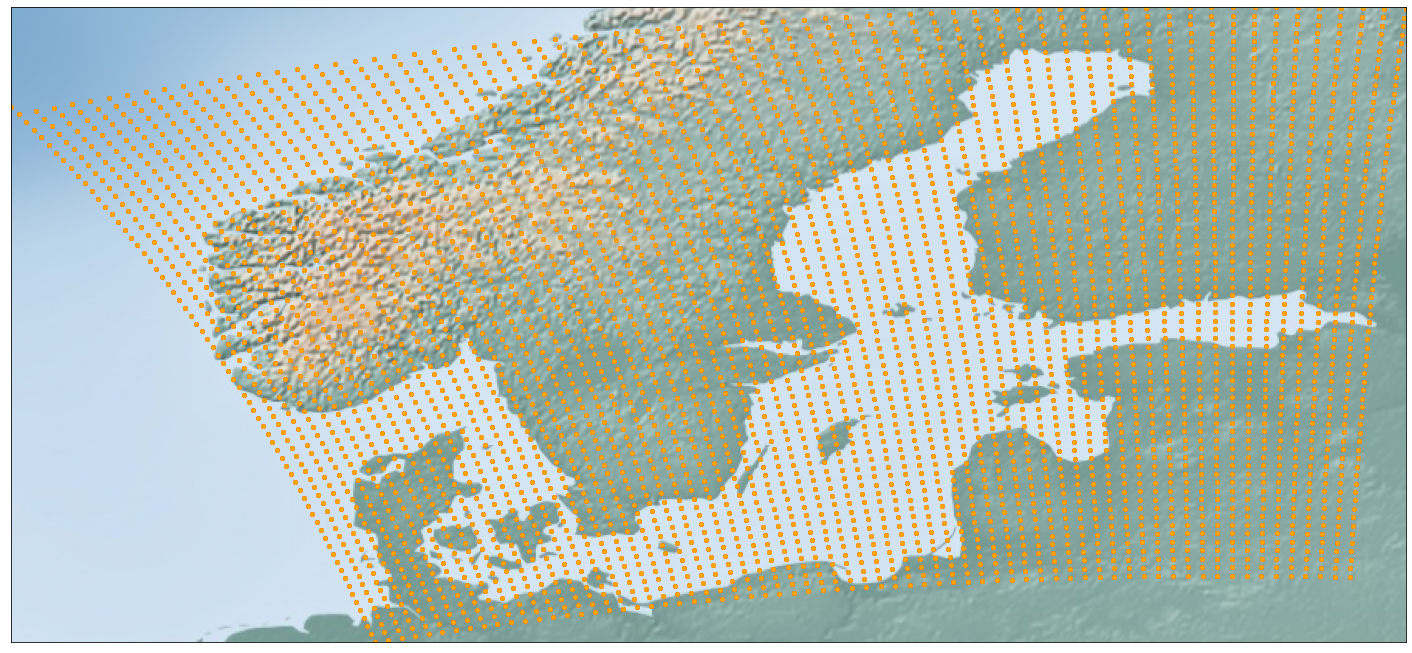

In [7]:
import mpl_toolkits
visualize_graph(sea_graph, grid)

In [8]:
import fiona
import pyproj
from shapely.geometry import shape
from shapely.geometry import MultiPolygon
from shapely.geometry import Polygon
from shapely.geometry import Point

def get_nodes_inside_area(graph, area):
    keep = []
    for node in graph.original.drop_duplicates().values:
        latlon = grid.extract_coords_lat_lon(node)
        p = Point((latlon[1], latlon[0]))
        if area.contains(p):
            keep.append(node)
    return set(keep)


def get_nodes_not_inside_area_accurate(graph, area):
    keep = []
    for node in graph.original.drop_duplicates().values:
        rowcol = grid.extract_coords(node)
        row = rowcol[0]
        col = rowcol[1]
        sw = shapely.geometry.Point(pyproj.transform(grid.p_to, grid.p_from, grid.cols[col], grid.rows[row]))
        se = shapely.geometry.Point(pyproj.transform(grid.p_to, grid.p_from, grid.cols[col] + grid.side_length, grid.rows[row]))
        nw = shapely.geometry.Point(pyproj.transform(grid.p_to, grid.p_from, grid.cols[col], grid.rows[row] + grid.side_length))
        ne = shapely.geometry.Point(pyproj.transform(grid.p_to, grid.p_from, grid.cols[col] + grid.side_length, grid.rows[row] + grid.side_length))
        pointlist = list([sw, se, ne, nw])

        cell = shapely.geometry.Polygon([[p.x, p.y] for p in pointlist])

        if  area.contains(cell):
            continue
        
        keep.append(node)
            
    return set(keep)

In [ ]:
pip install fiona